In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title):
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    return dataset, training_dataset

def get_ts_ids(dataset, ts_names):
    ts_ids = []
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name in ts_names:
            ts_ids.append(ts.id)
            
    return ts_ids

def get_lisa_detection_ts_id(dataset, ts_name):
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name == ts_name:
            return ts.id
    return None

In [4]:
def lisa_pearson_l(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    return lisa_pearson(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size)

In [5]:
def lisa_dtw_l(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10, distance_function='euclidean'):
    return lisa_dtw(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size, distance_function=distance_function)

In [6]:
def lisa_geo_l(df, df_class, time_series_id, maximize_score='F1-Score'):
    return lisa_geo(df, df_class, time_series_id, maximize_score=maximize_score)

In [7]:
def rpca_detection_l(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    return robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [8]:
def histogram_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    return histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [9]:
def cluster_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    return cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [10]:
def svm_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    return svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [11]:
def isolation_forest_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    return isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [1]:
# Hum1 Single - Contamination Rate
dataset_names = [
    'Humidity',
    'Humidity CL100',
    'Humidity CL150',
    'Humidity CL200',
    'Humidity CL250'
]
dimensions = [50, 100, 150, 200, 250]
ts_name_lisa = 'LUZ'

In [13]:
# Contamination Rate - LISA PEARSON
# Results array [nmi, rmse, f1]
pearson_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    
    scores, y_hat_results, info, df_response, df_class_response = lisa_pearson_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    pearson_results.append(result)
    
lisa_pearson_results = np.array(pearson_results)

In [14]:
# Contamination Rate - LISA DTW
# Results array [nmi, rmse, f1]
dtw_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    
    scores, y_hat_results, info, df_response, df_class_response = lisa_dtw_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    dtw_results.append(result)
    
lisa_dtw_results = np.array(dtw_results)

In [15]:
# Contamination Rate - LISA GEO
# Results array [nmi, rmse, f1]
geo_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    
    scores, y_hat_results, info = lisa_geo_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    geo_results.append(result)
    
lisa_spatial_results = np.array(geo_results)

In [16]:
# Contamination Rate - RPCA
# Results array [nmi, rmse, f1]
r_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = rpca_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    r_results.append(result)
    
rpca_results = np.array(r_results)  

In [17]:
# Contamination Rate - HISTOGRAM
# Results array [nmi, rmse, f1]
h_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = histogram_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    h_results.append(result)
    
histogram_results = np.array(h_results)

In [18]:
# Contamination Rate - CLUSTER
# Results array [nmi, rmse, f1]
c_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = cluster_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    c_results.append(result)
    
cluster_results = np.array(c_results)  

In [19]:
# Contamination Rate - SVM
# Results array [nmi, rmse, f1]
s_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = svm_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    s_results.append(result)
    
svm_results = np.array(s_results)  

In [20]:
# Contamination Rate - ISOLATION FOREST
# Results array [nmi, rmse, f1]
i_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = isolation_forest_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    i_results.append(result)

isolation_results = np.array(i_results)

In [21]:
scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [22]:
print(scores)

[{'title': 'LISA (Pearson)', 'scores': array([[0.381, 0.027, 0.617],
       [0.43 , 0.04 , 0.691],
       [0.418, 0.056, 0.702],
       [0.438, 0.069, 0.743],
       [0.467, 0.074, 0.776]])}, {'title': 'LISA (DTW)', 'scores': array([[0.358, 0.027, 0.594],
       [0.435, 0.042, 0.699],
       [0.417, 0.064, 0.709],
       [0.462, 0.067, 0.761],
       [0.459, 0.076, 0.772]])}, {'title': 'LISA (Vanilla)', 'scores': array([[0.454, 0.022, 0.68 ],
       [0.508, 0.032, 0.747],
       [0.58 , 0.037, 0.818],
       [0.613, 0.045, 0.845],
       [0.622, 0.049, 0.863]])}, {'title': 'RPCA', 'scores': array([[0.563, 0.015, 0.744],
       [0.362, 0.045, 0.496],
       [0.368, 0.065, 0.522],
       [0.335, 0.089, 0.496],
       [0.318, 0.113, 0.489]])}, {'title': 'Histogram', 'scores': array([[0.   , 0.583, 0.068],
       [0.015, 0.554, 0.161],
       [0.009, 0.549, 0.211],
       [0.01 , 0.537, 0.265],
       [0.013, 0.525, 0.317]])}, {'title': 'Cluster', 'scores': array([[0.451, 0.02 , 0.667],
  

In [2]:
import numpy as np
scores = [{'title': 'LISA (Pearson)', 'scores': np.array([[0.381, 0.027, 0.617],
       [0.43 , 0.04 , 0.691],
       [0.418, 0.056, 0.702],
       [0.438, 0.069, 0.743],
       [0.467, 0.074, 0.776]])}, {'title': 'LISA (DTW)', 'scores': np.array([[0.358, 0.027, 0.594],
       [0.435, 0.042, 0.699],
       [0.417, 0.064, 0.709],
       [0.462, 0.067, 0.761],
       [0.459, 0.076, 0.772]])}, {'title': 'LISA (Vanilla)', 'scores': np.array([[0.454, 0.022, 0.68 ],
       [0.508, 0.032, 0.747],
       [0.58 , 0.037, 0.818],
       [0.613, 0.045, 0.845],
       [0.622, 0.049, 0.863]])}, {'title': 'RPCA', 'scores': np.array([[0.563, 0.015, 0.744],
       [0.362, 0.045, 0.496],
       [0.368, 0.065, 0.522],
       [0.335, 0.089, 0.496],
       [0.318, 0.113, 0.489]])}, {'title': 'Histogram', 'scores': np.array([[0.   , 0.583, 0.068],
       [0.015, 0.554, 0.161],
       [0.009, 0.549, 0.211],
       [0.01 , 0.537, 0.265],
       [0.013, 0.525, 0.317]])}, {'title': 'Cluster', 'scores': np.array([[0.451, 0.02 , 0.667],
       [0.287, 0.05 , 0.4  ],
       [0.314, 0.071, 0.454],
       [0.295, 0.095, 0.444],
       [0.288, 0.119, 0.447]])}, {'title': 'SVM', 'scores': np.array([[0.209, 0.039, 0.438],
       [0.176, 0.065, 0.419],
       [0.227, 0.079, 0.48 ],
       [0.21 , 0.104, 0.466],
       [0.204, 0.127, 0.465]])}, {'title': 'Isolation Forest', 'scores': np.array([[0.048, 0.363, 0.142],
       [0.091, 0.352, 0.258],
       [0.089, 0.348, 0.329],
       [0.117, 0.332, 0.41 ],
       [0.11 , 0.337, 0.452]])}]

In [5]:
#NMI
results = []
for score in scores:
    res = []
    values = score['scores']
    for i in range(len(dimensions)):
        dim = dimensions[i]
        val = values[i][0]
        res.append((dim, val))
    results.append({'title' : score['title'], 'plotdata' : res}) 

In [6]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

[   {   'plotdata': [   (50, 0.381),
                        (100, 0.43),
                        (150, 0.418),
                        (200, 0.438),
                        (250, 0.467)],
        'title': 'LISA (Pearson)'},
    {   'plotdata': [   (50, 0.358),
                        (100, 0.435),
                        (150, 0.417),
                        (200, 0.462),
                        (250, 0.459)],
        'title': 'LISA (DTW)'},
    {   'plotdata': [   (50, 0.454),
                        (100, 0.508),
                        (150, 0.58),
                        (200, 0.613),
                        (250, 0.622)],
        'title': 'LISA (Vanilla)'},
    {   'plotdata': [   (50, 0.563),
                        (100, 0.362),
                        (150, 0.368),
                        (200, 0.335),
                        (250, 0.318)],
        'title': 'RPCA'},
    {   'plotdata': [   (50, 0.0),
                        (100, 0.015),
                        (150, 0.009),
 

In [7]:
#RMSE
results = []
for score in scores:
    res = []
    values = score['scores']
    for i in range(len(dimensions)):
        dim = dimensions[i]
        val = values[i][1]
        res.append((dim, val))
    results.append({'title' : score['title'], 'plotdata' : res}) 

In [8]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

[   {   'plotdata': [   (50, 0.027),
                        (100, 0.04),
                        (150, 0.056),
                        (200, 0.069),
                        (250, 0.074)],
        'title': 'LISA (Pearson)'},
    {   'plotdata': [   (50, 0.027),
                        (100, 0.042),
                        (150, 0.064),
                        (200, 0.067),
                        (250, 0.076)],
        'title': 'LISA (DTW)'},
    {   'plotdata': [   (50, 0.022),
                        (100, 0.032),
                        (150, 0.037),
                        (200, 0.045),
                        (250, 0.049)],
        'title': 'LISA (Vanilla)'},
    {   'plotdata': [   (50, 0.015),
                        (100, 0.045),
                        (150, 0.065),
                        (200, 0.089),
                        (250, 0.113)],
        'title': 'RPCA'},
    {   'plotdata': [   (50, 0.583),
                        (100, 0.554),
                        (150, 0.549)

In [10]:
#F1
results = []
for score in scores:
    res = []
    values = score['scores']
    for i in range(len(dimensions)):
        dim = dimensions[i]
        val = values[i][2]
        res.append((dim, val))
    results.append({'title' : score['title'], 'plotdata' : res}) 

In [11]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

[   {   'plotdata': [   (50, 0.617),
                        (100, 0.691),
                        (150, 0.702),
                        (200, 0.743),
                        (250, 0.776)],
        'title': 'LISA (Pearson)'},
    {   'plotdata': [   (50, 0.594),
                        (100, 0.699),
                        (150, 0.709),
                        (200, 0.761),
                        (250, 0.772)],
        'title': 'LISA (DTW)'},
    {   'plotdata': [   (50, 0.68),
                        (100, 0.747),
                        (150, 0.818),
                        (200, 0.845),
                        (250, 0.863)],
        'title': 'LISA (Vanilla)'},
    {   'plotdata': [   (50, 0.744),
                        (100, 0.496),
                        (150, 0.522),
                        (200, 0.496),
                        (250, 0.489)],
        'title': 'RPCA'},
    {   'plotdata': [   (50, 0.068),
                        (100, 0.161),
                        (150, 0.211)

In [11]:
def generate_nmi_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,0], marker=".", label=title)
    ax.set_ylabel('Score (NMI)')
    ax.set_xlabel('Number of Outliers')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 50))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

In [12]:
def generate_rmse_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,1], marker=".", label=title)
    ax.set_ylabel('Score (RMSE)')
    ax.set_xlabel('Number of Outliers')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 50))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

In [13]:
def generate_f1_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,2], marker=".", label=title)
    ax.set_ylabel('Score (F1)')
    ax.set_xlabel('Number of Outliers')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 50))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

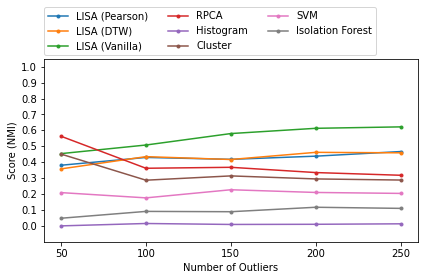

In [14]:
generate_nmi_line_chart(dimensions, scores)

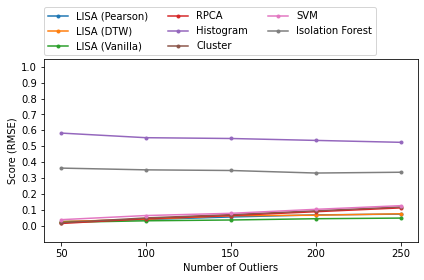

In [15]:
generate_rmse_line_chart(dimensions, scores)

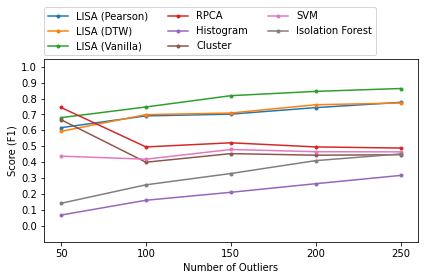

In [16]:
generate_f1_line_chart(dimensions, scores)